In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the dataset
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#first 5 rows of the dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
#summary about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# Encoding The Categorical Value
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(f'Shape of the dataset: {df.shape}')  #number of rows and columns
print(f'Class Categories: {df[" loan_status"].unique()}')  #our categories
print(f'number of records of 0: {(df[" loan_status"] == 0).sum()}')  #number of records with class 0
print(f'number of records of 1: {(df[" loan_status"]==1).sum()}')  #number of records with class 1

Shape of the dataset: (4269, 13)
Class Categories: [0 1]
number of records of 0: 2656
number of records of 1: 1613


In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
df.drop('loan_id', axis=1, inplace=True)


In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


<Axes: xlabel=' loan_status', ylabel='count'>

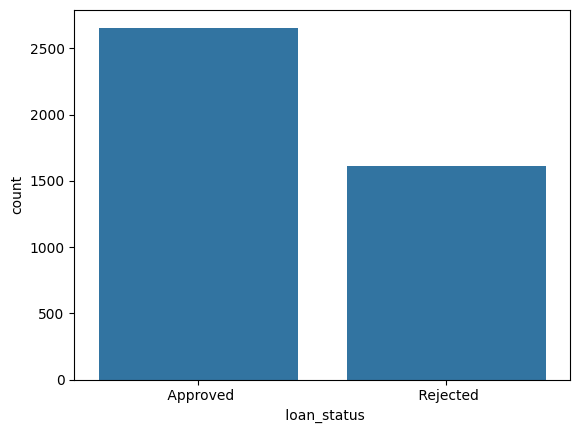

In [ ]:
sns.countplot(x=' loan_status', data=df)  #displays the counts of observations in each categorical bin using bars

In [ ]:
X = df.drop(" loan_status", axis=1)
y = df[" loan_status"]


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
dtypes: int64(11)
memory usage: 367.0 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name:  loan_status
Non-Null Count  Dtype
--------------  -----
4269 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


Address class imbalance with SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


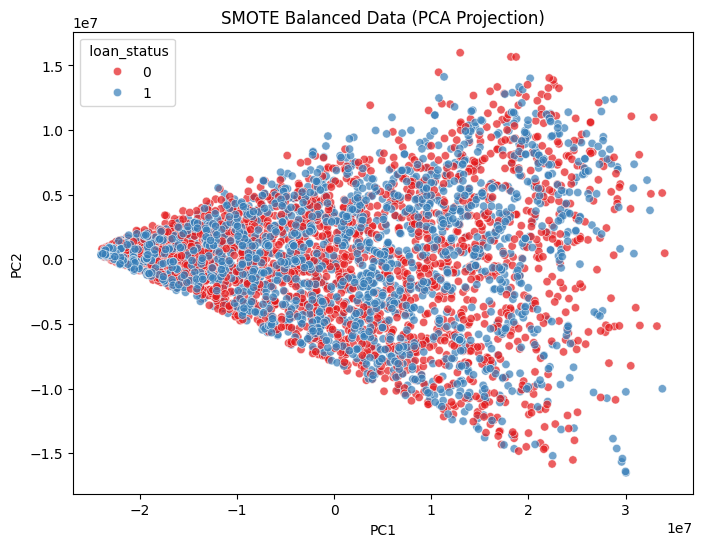

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_balanced)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train_balanced, palette='Set1', alpha=0.7)
plt.title("SMOTE Balanced Data (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Training my dataset with balanced data

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(random_state=42)

Evaluate Model Performance

In [ ]:
from sklearn.metrics import classification_report

y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       536
           1       0.72      0.68      0.70       318

    accuracy                           0.78       854
   macro avg       0.77      0.76      0.77       854
weighted avg       0.78      0.78      0.78       854

Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.96      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



Confusion Matrix Visualization

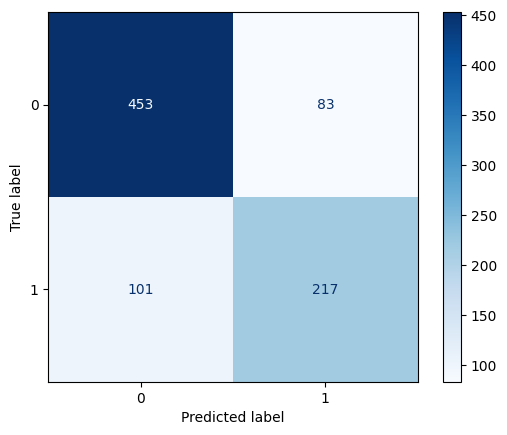

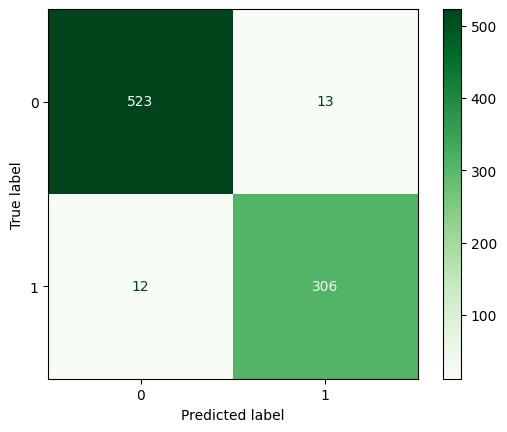

In [ ]:
# performance vizualisation
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap="Blues")
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap="Greens")


Training my dataset with Imbalanced (Original) data

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       536
           1       0.80      0.61      0.69       318

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854

Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

